In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [10]:
# Load the dataset
df = pd.read_csv("owid-co2-data.csv")

# Displaying the basic information about dataset (columns, data types, non-null counts)
print(df.head())


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

In [12]:
# Filter data: Years 2000–2023 
df_countries = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

# Keep only country rows (exclude World/continents) e.g. USA, IND
df_countries = df_countries[df_countries['iso_code'].str.len() == 3]

# Select relevant columns
cols_needed = ['country', 'year', 'co2_per_capita', 'energy_per_capita', 'temperature_change_from_co2']

df_countries = df_countries[cols_needed]

# Drop rows with missing values
df_clean = df_countries.dropna()


In [14]:
# Compute summary stats
summary_stats = df_clean.describe().loc[['mean', '50%', 'std', 'min', 'max']]
summary_stats.rename(index={'50%': 'median'}, inplace=True)
print(summary_stats)

# Optional: save to CSV
summary_stats.to_csv('summary_statistics.csv')

               year  co2_per_capita  energy_per_capita  \
mean    2010.950422        4.951017       26212.530742   
median  2011.000000        2.844000       14448.704000   
std        6.597007        6.361380       34006.783734   
min     2000.000000        0.022000           0.000000   
max     2023.000000       67.584000      263541.625000   

        temperature_change_from_co2  
mean                       0.004916  
median                     0.001000  
std                        0.018678  
min                        0.000000  
max                        0.241000  


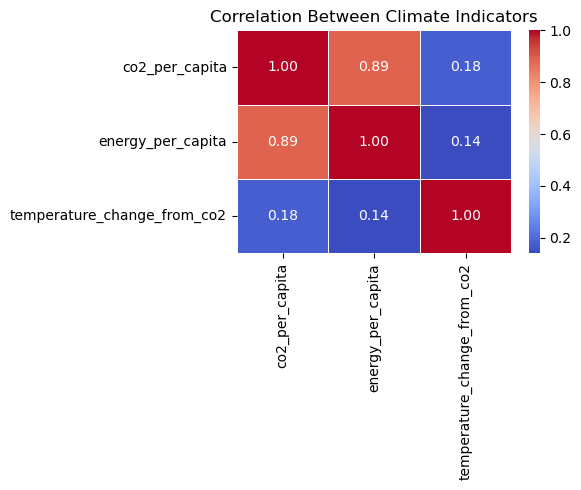

In [24]:
# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df_clean[['co2_per_capita', 'energy_per_capita', 'temperature_change_from_co2']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Climate Indicators')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

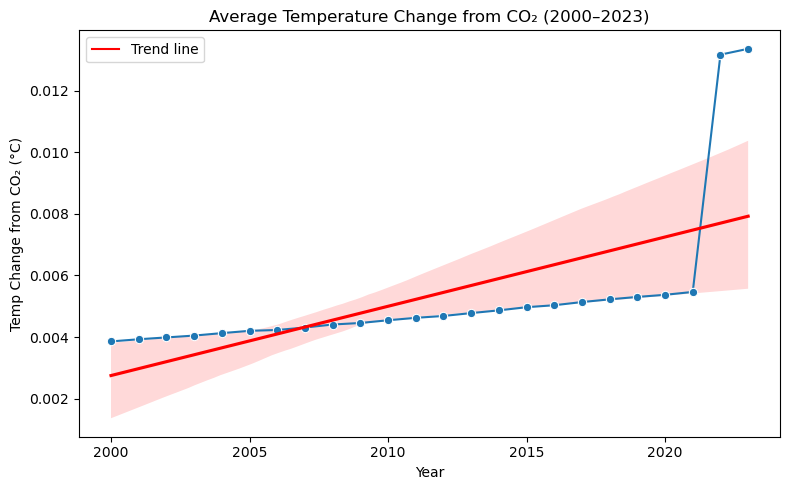

In [28]:
# Line Plot - Temp change over time: Global average temperature from CO2 per year
temp_trend = df_clean.groupby('year')['temperature_change_from_co2'].mean().reset_index()

plt.figure(figsize=(8,5))

# Plot temperature line
sns.lineplot(data=temp_trend, x='year', y='temperature_change_from_co2', marker='o')

# Add regression line and manually create label
reg = sns.regplot(data=temp_trend, x='year', y='temperature_change_from_co2',
                  scatter=False, color='red')

# Add manual legend
plt.plot([], [], color='red', label='Trend line')  # dummy artist for legend

plt.title('Average Temperature Change from CO₂ (2000–2023)')
plt.ylabel('Temp Change from CO₂ (°C)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
#plt.savefig('temperature_trend.png')
plt.show()

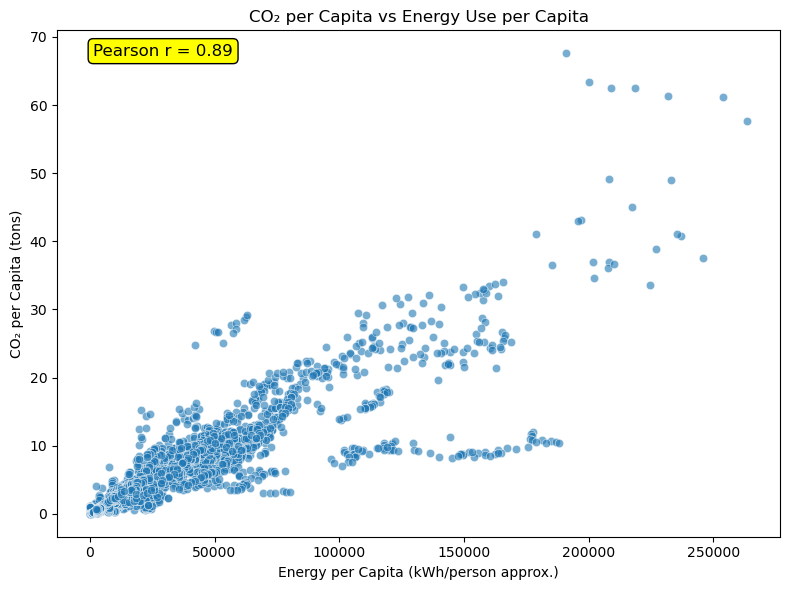

In [20]:
# Scatter Plot – CO₂ vs. Energy Usage
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='energy_per_capita', y='co2_per_capita', alpha=0.6)
plt.title('CO₂ per Capita vs Energy Use per Capita')
plt.xlabel('Energy per Capita (kWh/person approx.)')
plt.ylabel('CO₂ per Capita (tons)')

# Add correlation annotation
corr_val, _ = pearsonr(df_clean['energy_per_capita'], df_clean['co2_per_capita'])
plt.annotate(f"Pearson r = {corr_val:.2f}", xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black"))
plt.tight_layout()
#plt.savefig('co2_vs_energy.png')
plt.show()

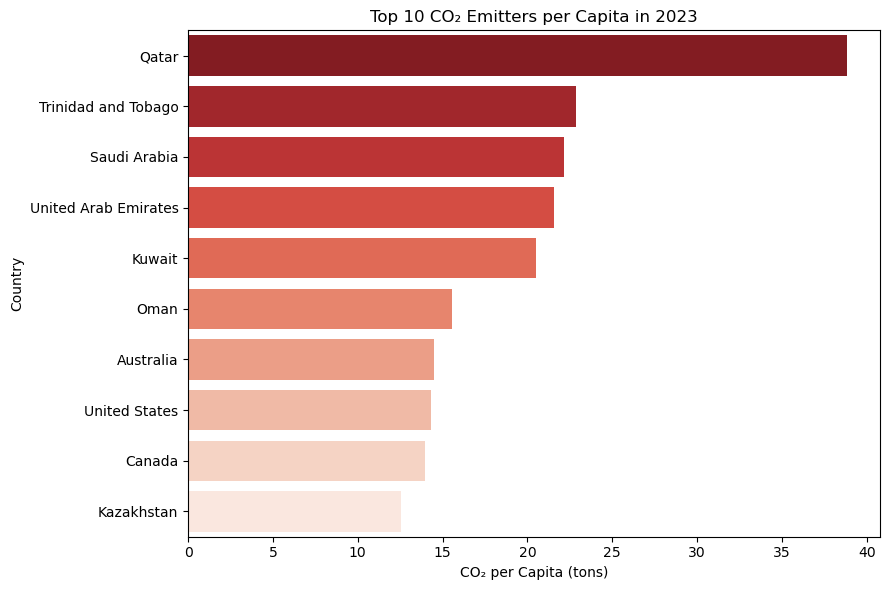

In [26]:
# Bar Plot – Top 10 Emitters (Latest Year)
atest_year = df_clean['year'].max()
df_latest = df_clean[df_clean['year'] == latest_year]
top_emitters = df_latest.sort_values(by='co2_per_capita', ascending=False).head(10)

plt.figure(figsize=(9,6))

sns.barplot(data=top_emitters, x='co2_per_capita', y='country', hue='country', palette='Reds_r', legend=False)

plt.title(f'Top 10 CO₂ Emitters per Capita in {latest_year}')
plt.xlabel('CO₂ per Capita (tons)')
plt.ylabel('Country')
plt.tight_layout()
#plt.savefig('top10_emitters.png')
plt.show()